In [3]:


import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler


df = pd.read_csv('asthma_disease_data.csv')

# Display basic information
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [6]:
# Check for missing values
missing_values = df.isnull().sum()

# Display only columns with missing values
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [7]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Duplicate Rows: {duplicate_rows}")

# Remove duplicates if any
df = df.drop_duplicates()


Duplicate Rows: 0


In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode 'DoctorInCharge'
label_encoder = LabelEncoder()
df['DoctorInCharge'] = label_encoder.fit_transform(df['DoctorInCharge'])


In [9]:
from sklearn.preprocessing import StandardScaler

# Define numerical features to scale
numerical_features = ['BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
                      'PollutionExposure', 'PollenExposure', 'DustExposure',
                      'LungFunctionFEV1', 'LungFunctionFVC']

# Apply Standard Scaling
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [10]:
import numpy as np

# Define function to remove outliers using IQR
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply to numerical columns
for col in numerical_features:
    df = remove_outliers(df, col)


In [12]:
# Save the preprocessed dataset
preprocessed_file_path = "asthma_preprocessed.csv"
df.to_csv(preprocessed_file_path, index=False)

print(f"Preprocessed dataset saved at: {preprocessed_file_path}")


Preprocessed dataset saved at: asthma_preprocessed.csv


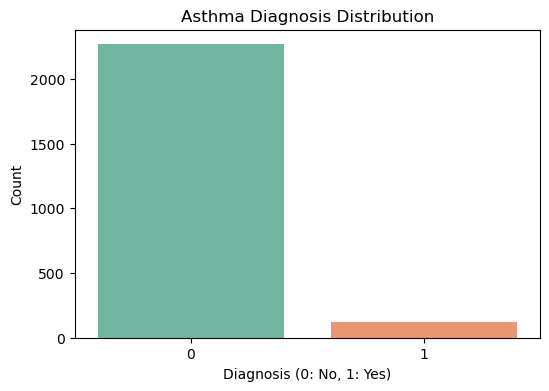

In [15]:
# Visualizing the Asthma Diagnosis count
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x=df['Diagnosis'], palette="Set2")
plt.title("Asthma Diagnosis Distribution")
plt.xlabel("Diagnosis (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()


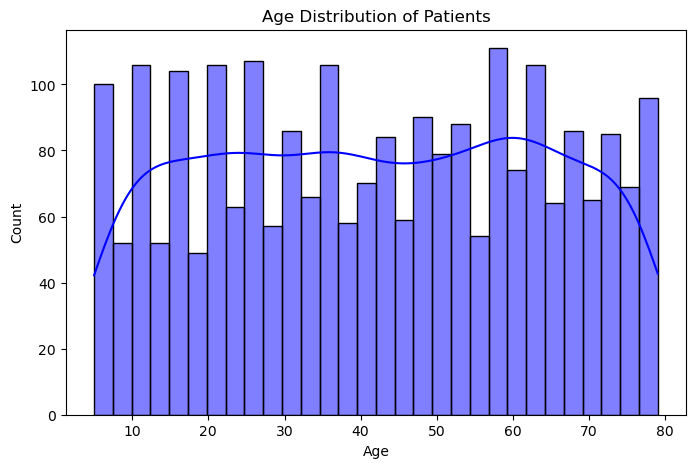

In [17]:
# Visualizing the distribution of Age
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()